<strong>
        <center><h4 style = "margin-right:60px"><font size = 6> Image Captioning-Attention mechanism</font></h4></center>
    </strong>

<center><h1 class="list-group-item list-group-item-success"><font size = 6>Image Captioning -Scratch(attention mechanism)</font></h1></center><br>

<center><img src  = "https://miro.medium.com/max/1200/0*l9ukrShU3cp2SU_n.gif"></center><br>

## Introduction
<font size = 3>   
Caption generation is a challenging artificial intelligence problem where a textual description must be generated for a given photograph.It requires both methods from computer vision to understand the content of the image and a language model from the field of natural language processing to turn the understanding of the image into words in the right order. </font><br>

## Problem Statement
<font size = 3>  
With the recent advancement in computational hardware & software, Deep learning (DL) has revolutionized the future of artificial intelligence (AI) and cognition based intelligence. It has shown outstanding results in the areas of  computer vision and Natural Language Processing. Many research efforts have produced remarkable results in mapping images to high-level features, as explored in Alex Krizhevsky et al.’s 2012 paper which won the ImageNet Large Scale Visual Recognition Challenge  and more recent work has extended deep learning to various use cases

But contextual data predictions in image video and audio have been difficult due to complexity of human language, with various phonetics and meaning of the same words producing various context</font>
    
## Aim
<font size = 3>  
We plan to produce a better model that tries to perform image captioning based on the scene graph and entity relations followed by the reversal of the context to generate the image to demonstrate how the context is interpreted from the image and vice versa</font>

## Team Members <br>
  
<font size = 3>
1.   L Vishal (E0119010) <br><br> 
2.   V Karan (E0119039)<br><br>
3.   M Sathishkumar (E0119052)<br>
</font>

## Techniques Used 
<ul>
  <li><p>Raditional CNN-RNN model</p></li>
  <li><p>Attention model(if required)</p></li>
  <li><p>Text and Image preprocessing</p></li>
  <li><p>Data Visualization using wordcloud</p></li>
  <li><p>Model training and model evaluation (INCEPTIONV3)</p></li>
  <li><p>Greedy search vs Beam search and BLUE Score</p></li>
  
</ul>


    


<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>IMPORTING PACKAGES</font></h4>
    </strong>
</div><br>

In [1]:
#Import all the required libraries


!pip install wordcloud
!pip install gtts
!pip install playsound

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import tensorflow as tf
import keras
from keras.preprocessing.image import load_img
import string
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import Input
from PIL import Image
#used for creating Progress Meters or Progress Bars
from tqdm import tqdm


     |████████████████████████████████| 62 kB 906 kB/s             
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
beatrix-jupyterlab 3.1.6 requires google-cloud-bigquery-storage, which is not installed.
spacy 3.2.2 requires typing-extensions<4.0.0.0,>=3.7.4; python_version < "3.8", but you have typing-extensions 4.1.1 which is incompatible.
gcsfs 2021.11.1 requires fsspec==2021.11.1, but you have fsspec 2022.2.0 which is incompatible.
apache-beam 2.34.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.4 which is incompatible.
apache-beam 2.34.0 requires httplib2<0.20.0,>=0.8, but you have httplib2 0.20.2 which is incompa

In [2]:
!pip install underthesea

     |████████████████████████████████| 20.9 MB 5.5 MB/s            
     |████████████████████████████████| 1.1 MB 56.1 MB/s            
     |████████████████████████████████| 657 kB 62.7 MB/s            


In [3]:
from underthesea import word_tokenize
text = "Chàng trai 9X Quảng Trị khởi nghiệp từ nấm sò"

word_tokenize(text)

['Chàng', 'trai', '9X', 'Quảng Trị', 'khởi nghiệp', 'từ', 'nấm', 'sò']

In [4]:
import glob
from gtts import gTTS
from playsound import playsound
from IPython import display
import collections
import wordcloud
from wordcloud import WordCloud, STOPWORDS


In [5]:
import numpy as np 
import pandas as pd 
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))



 <h2> Data Understanding and Visualization
</h2><ul>
  <li><p>Import the dataset and read image and captions into two seperate variables</p>
        </li>
  <li><p>Visualise both the images & text present in the dataset</p></li>
  <li>Visualise the top 30 occuring words in the captions
</li>
    li>Visualise the top 30 occuring words in the captions
</li>
<li>Create a list which contains all the captions & path</li>
</ul>





In [6]:
images='/kaggle/input/healthcare-vietnamese-images-captioning/images'
all_imgs = glob.glob(images + '/*.png',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 150


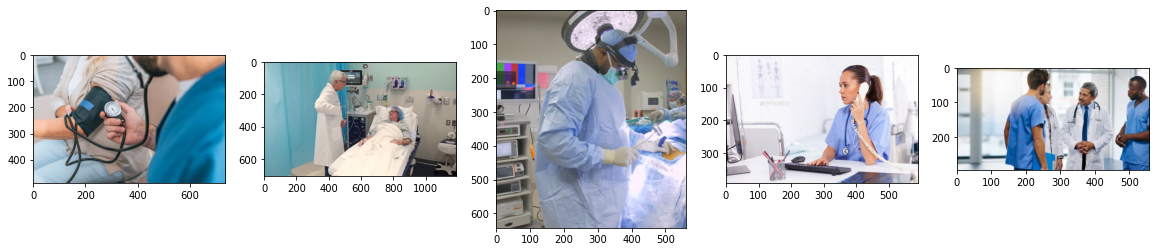

In [7]:
import imageio
#Visualising first 5 images :
Display_Images = all_imgs[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(20)
for ax, image in zip(axes, Display_Images):
  ax.imshow(imageio.imread(image), cmap=None)


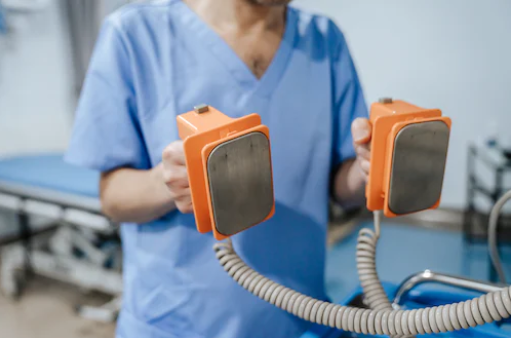

In [8]:
import random
Image.open(all_imgs[random.randrange(40, 60, 3)])# view a random image
import random
Image.open(all_imgs[random.randrange(40, 60, 3)])

In [9]:
text_file = '/kaggle/input/healthcare-vietnamese-images-captioning/images_captions_vi.txt'
def load_doc(filename):
    open_file = open(text_file, 'r', encoding='latin-1' ) 
    text = open_file.read() 
    open_file.close()
    return text
doc = load_doc(text_file)
print(doc[:300])

image,caption
1.png, má»t ngÆ°á»i ÄÃ n Ã´ng lá»n tuá»i Äang ÄÆ°á»£c tiÃªm váº¯c-xin bá»i bÃ¡c sÄ© ná»¯.
1.png, ngÆ°á»i ÄÃ n Ã´ng Äeo kháº©u trang ÄÆ°á»£c y tÃ¡ tiÃªm thuá»c trong phÃ²ng khÃ¡m.
1.png, bÃ¡c sÄ© máº·c Ã¡o blouse tráº¯ng Äang tiÃªm thuá»c cho bá»nh nhÃ¢n nam.
1.png, cáº£


In [10]:
img_path = '/kaggle/input/healthcare-vietnamese-images-captioning/images/'

all_img_id = [] 
all_img_vector = [] 
annotations = [] 

with open('/kaggle/input/healthcare-vietnamese-images-captioning/images_captions_vi.txt' , 'r') as fo:
  next(fo) 
  for line in fo :
    split_arr = line.split(',')
    all_img_id.append(split_arr[0])
    annotations.append(split_arr[1].rstrip('\n.')) #removing out the \n.
    all_img_vector.append(img_path+split_arr[0])

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df

ID                                               Path  \
0      1.png  /kaggle/input/healthcare-vietnamese-images-cap...   
1      1.png  /kaggle/input/healthcare-vietnamese-images-cap...   
2      1.png  /kaggle/input/healthcare-vietnamese-images-cap...   
3      1.png  /kaggle/input/healthcare-vietnamese-images-cap...   
4      2.png  /kaggle/input/healthcare-vietnamese-images-cap...   
..       ...                                                ...   
547  149.png  /kaggle/input/healthcare-vietnamese-images-cap...   
548  150.png  /kaggle/input/healthcare-vietnamese-images-cap...   
549  150.png  /kaggle/input/healthcare-vietnamese-images-cap...   
550  150.png  /kaggle/input/healthcare-vietnamese-images-cap...   
551  150.png  /kaggle/input/healthcare-vietnamese-images-cap...   

                                              Captions  
0     một người đàn ông lớn tuổi đang được tiêm vắc...  
1     người đàn ông đeo khẩu trang được y tá tiêm t...  
2     bác sĩ mặc áo blouse trắng đang tiêm thuốc ch...  
3     cảnh tiêm phòng tại bệnh viện với sự hỗ trợ c...  
4     bác sĩ nha khoa đang chuẩn bị thực hiện chụp ...  
..                                                 ...  
547   người đàn ông được thăm khám tại bệnh viện vớ...  
548   người đàn ông đang được làm xét nghiệm COVID-...  
549   y bác sĩ trong trang phục bảo hộ đang thực hi...  
550   bệnh nhân cảm thấy hơi khó chịu khi dụng cụ x...  
551   quy trình lấy mẫu xét nghiệm nhanh chóng và a...  

[552 rows x 3 columns]

In [11]:
#check total captions and images present in dataset
print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_imgs)))

Total captions present in the dataset: 552
Total images present in the dataset: 150


In [12]:
#Create the vocabulary & the counter for the captions
vocabulary = [word.lower() for line in annotations for word in line.split()]
val_count = Counter(vocabulary) 
val_count

Counter({'một': 49,
         'người': 76,
         'đàn': 27,
         'ông': 27,
         'lớn': 13,
         'tuổi': 21,
         'đang': 287,
         'được': 81,
         'tiêm': 44,
         'vắc-xin': 1,
         'bởi': 12,
         'bác': 274,
         'sĩ': 290,
         'nữ': 63,
         'đeo': 15,
         'khẩu': 14,
         'trang': 28,
         'y': 247,
         'tá': 89,
         'thuốc': 32,
         'trong': 142,
         'phòng': 90,
         'khám': 52,
         'mặc': 37,
         'áo': 17,
         'blouse': 5,
         'trắng': 13,
         'cho': 118,
         'bệnh': 321,
         'nhân': 289,
         'nam': 21,
         'cảnh': 7,
         'tại': 49,
         'viện': 36,
         'với': 62,
         'sự': 24,
         'hỗ': 23,
         'trợ': 27,
         'của': 101,
         'các': 78,
         'viên': 71,
         'tế': 148,
         'nha': 9,
         'khoa': 13,
         'chuẩn': 37,
         'bị': 63,
         'thực': 49,
         'hiện': 52,
         

bệnh :  321
sĩ :  290
nhân :  289
đang :  287
bác :  274
y :  247
tế :  148
trong :  142
cho :  118
và :  112
của :  101
phòng :  90
tá :  89
thuật :  84
được :  81
các :  78
người :  76
trên :  73
viên :  71
kiểm :  68
tra :  66
nữ :  63
bị :  63
với :  62
phẫu :  59
máy :  55
khám :  52
hiện :  52
khi :  52
hình :  50


Text(0, 0.5, 'Count')

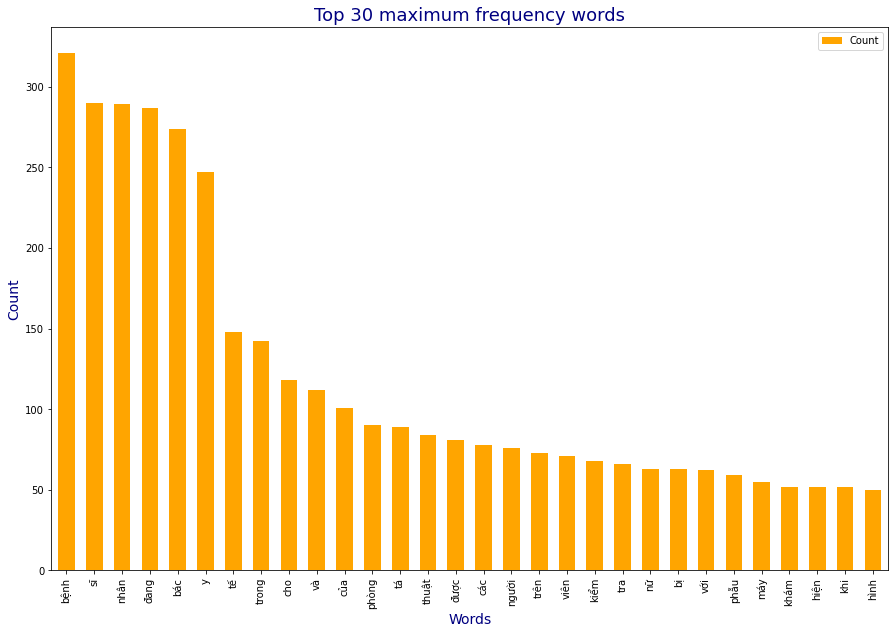

In [13]:
#Visualise the top 30 occuring words in the captions
for word, count in val_count.most_common(30):
  print(word, ": ", count)

lst = val_count.most_common(30)
most_common_words_df = pd.DataFrame(lst, columns = ['Word', 'Count'])
most_common_words_df.plot.bar(x='Word', y='Count', width=0.6, color='orange', figsize=(15, 10))
plt.title("Top 30 maximum frequency words", fontsize = 18, color= 'navy')
plt.xlabel("Words", fontsize = 14, color= 'navy')
plt.ylabel("Count", fontsize = 14, color= 'navy')


### Clearly STOPWORDS form a clear majority

**Stop words are a set of commonly used words in a language.**

    Examples of stop words in English are “a”, “the”, “is”, “are” and etc. 
    
*Stop words are commonly used in **Text Mining and Natural Language Processing (NLP)** to eliminate words that are so commonly used that they carry very little useful information.*

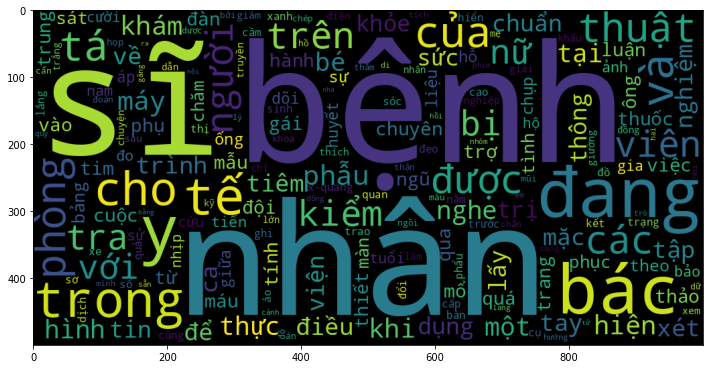

In [14]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(val_count)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

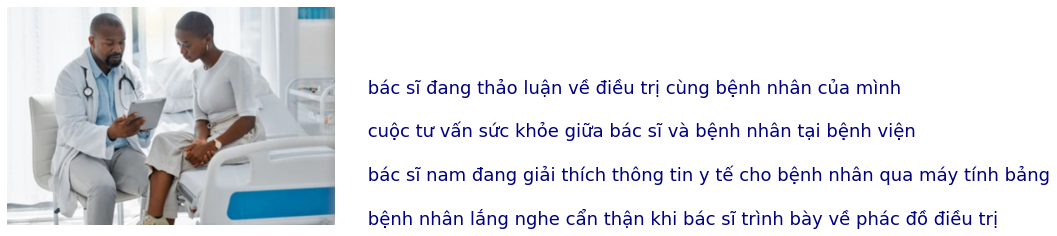

In [15]:
def caption_with_img_plot(image_id, frame) :
  capt = ("\n" *2).join(frame[frame['ID'] == image_id].Captions.to_list())
  fig, ax = plt.subplots()
  ax.set_axis_off()
  idx = df.ID.to_list().index(image_id)
  im =  Image.open(df.Path.iloc[idx])
  w, h = im.size[0], im.size[-1]
  ax.imshow(im)
  ax.text(w+50, h, capt, fontsize = 18, color = 'navy')
caption_with_img_plot(df.ID.iloc[149], df)


 <h2> Clean Data
</h2><ul>
<li><p> Remove punctuations</p></li>
<li><p>Convert captions to lowercase</p></li>
<li>Visualise the top 30 occuring words in the captions</li>
<li>Visualise the top 30 occuring words in the captions</li> 
<li>Create a list which contains all the captions & path</li>
</ul>





In [16]:
# # Load Vietnamese stopwords
# vietnamese_stopwords = set()
# with open('/kaggle/input/vietnamese-stopwords/vietnamese-stopwords.txt', 'r', encoding='utf-8') as f:
#     for line in f:
#         vietnamese_stopwords.add(line.strip())  # strip removes any whitespace characters


In [17]:
#data cleaning
rem_punct = str.maketrans('', '', string.punctuation)
for r in range(len(annotations)) :
  line = annotations[r]
  line = line.split()

  # converting to lowercase
  line = [word.lower() for word in line]

  # remove punctuation from each caption and hanging letters
  line = [word.translate(rem_punct) for word in line]
  line = [word for word in line if len(word) > 1]

  # remove numeric values
  line = [word for word in line if word.isalpha()]



In [18]:
# # We will apply Underthesea word_tokenize to each caption in the annotations

# annotations = [' '.join(word_tokenize(sentence, format="text")) for sentence in annotations]
annotations = [(word_tokenize(sentence, format="text")) for sentence in annotations]

annotations[r] = ' '.join(line)

# Now, let's print the first few tokenized annotations to check if they are tokenized correctly
print(annotations[:5])

['một người đàn_ông lớn_tuổi đang được tiêm vắc-xin bởi bác_sĩ nữ', 'người đàn_ông đeo khẩu_trang được y_tá tiêm thuốc trong phòng_khám', 'bác_sĩ mặc áo blouse trắng đang tiêm thuốc cho bệnh_nhân nam', 'cảnh tiêm phòng tại bệnh_viện với sự hỗ_trợ của các nhân_viên y_tế', 'bác_sĩ nha_khoa đang chuẩn_bị thực_hiện chụp X-quang cho bệnh_nhân']


In [19]:
#add the <start> & <end> token to all those captions as well
annotations = ['<start>' + ' ' + line + ' ' + '<end>' for line in annotations]

#Create a list which contains all the path to the images
all_img_path = all_img_vector

In [20]:
##list contatining captions for an image
annotations[0:5]

['<start> một người đàn_ông lớn_tuổi đang được tiêm vắc-xin bởi bác_sĩ nữ <end>',
 '<start> người đàn_ông đeo khẩu_trang được y_tá tiêm thuốc trong phòng_khám <end>',
 '<start> bác_sĩ mặc áo blouse trắng đang tiêm thuốc cho bệnh_nhân nam <end>',
 '<start> cảnh tiêm phòng tại bệnh_viện với sự hỗ_trợ của các nhân_viên y_tế <end>',
 '<start> bác_sĩ nha_khoa đang chuẩn_bị thực_hiện chụp X-quang cho bệnh_nhân <end>']

 <h2> Data Preprocessing</h2>
 <ul>
  <li><p>Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters./p>
        </li>
  <li><p>This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.</p></li>
    <li><p>Replace all other words with the unknown token "UNK"</p>
</li>
    <li><p>Create word-to-index and index-to-word mappings.</p>
</li>
    <li><p>Pad all sequences to be the same length as the longest one</p></li>
</ul>




In [21]:
# Creating the tokenizer
top_word_cnt = 5000
# Create the tokenizer after the underthesea tokenization
tokenizer = Tokenizer(num_words=top_word_cnt+1, filters='!"#$%&()*+.,-/:;=?@[\\]^`{|}~\t\n',
                      lower=True, split=' ', char_level=False, oov_token='UNK')

In [22]:
# Creating word-to-index and index-to-word mappings.

tokenizer.fit_on_texts(annotations)
#transform each text into a sequence of integers
train_seqs = tokenizer.texts_to_sequences(annotations)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

651


In [23]:
# We add PAD token for zero
tokenizer.word_index['PAD'] = 0
tokenizer.index_word[0] = 'PAD'

In [24]:
print(tokenizer.oov_token)
print(tokenizer.index_word[0])

UNK
PAD


In [25]:
tokenizer.index_word

{1: 'UNK',
 2: '<start>',
 3: '<end>',
 4: 'đang',
 5: 'bác_sĩ',
 6: 'bệnh_nhân',
 7: 'y_tế',
 8: 'trong',
 9: 'cho',
 10: 'và',
 11: 'của',
 12: 'y_tá',
 13: 'được',
 14: 'các',
 15: 'trên',
 16: 'kiểm_tra',
 17: 'người',
 18: 'với',
 19: 'phẫu_thuật',
 20: 'khi',
 21: 'phòng',
 22: 'một',
 23: 'tại',
 24: 'nhân_viên',
 25: 'bé',
 26: 'thực_hiện',
 27: 'để',
 28: 'về',
 29: 'ca',
 30: 'lấy',
 31: 'chuẩn_bị',
 32: 'bệnh_viện',
 33: 'tiêm',
 34: 'điều_trị',
 35: 'thông_tin',
 36: 'nữ',
 37: 'cuộc',
 38: 'từ',
 39: 'thuốc',
 40: 'phụ_nữ',
 41: 'tập_trung',
 42: 'mẫu',
 43: 'xét_nghiệm',
 44: 'máy_tính',
 45: 'gái',
 46: 'mổ',
 47: 'phòng_khám',
 48: 'vào',
 49: 'qua',
 50: 'mặc',
 51: 'đàn_ông',
 52: 'đội_ngũ',
 53: 'quá_trình',
 54: 'tim',
 55: 'máu',
 56: 'thảo_luận',
 57: 'thiết_bị',
 58: 'màn_hình',
 59: 'bảng',
 60: 'sự',
 61: 'hỗ_trợ',
 62: 'chụp',
 63: 'sức_khỏe',
 64: 'giữa',
 65: 'theo_dõi',
 66: 'nam',
 67: 'máy',
 68: 'sử_dụng',
 69: 'hình_ảnh',
 70: 'đo',
 71: 'nghe',
 72: 'q

In [26]:
# Creating a word count for our tokenizer to visualize the Top 30 occuring words after text processing

tokenizer_top_words = [word for line in annotations for word in line.split() ]

#tokenizer_top_words_count
tokenizer_top_words_count = collections.Counter(tokenizer_top_words)


<start> :  552
<end> :  552
đang :  287
bác_sĩ :  265
bệnh_nhân :  235
y_tế :  147
trong :  142
cho :  118
và :  112
của :  101
y_tá :  89
được :  81
các :  78
trên :  73
kiểm_tra :  66
người :  65
với :  62
phẫu_thuật :  57
khi :  52
phòng :  51
một :  49
tại :  49
nhân_viên :  49
bé :  49
thực_hiện :  48
để :  43
về :  42
ca :  38
lấy :  38
chuẩn_bị :  36


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  if sys.path[0] == '':


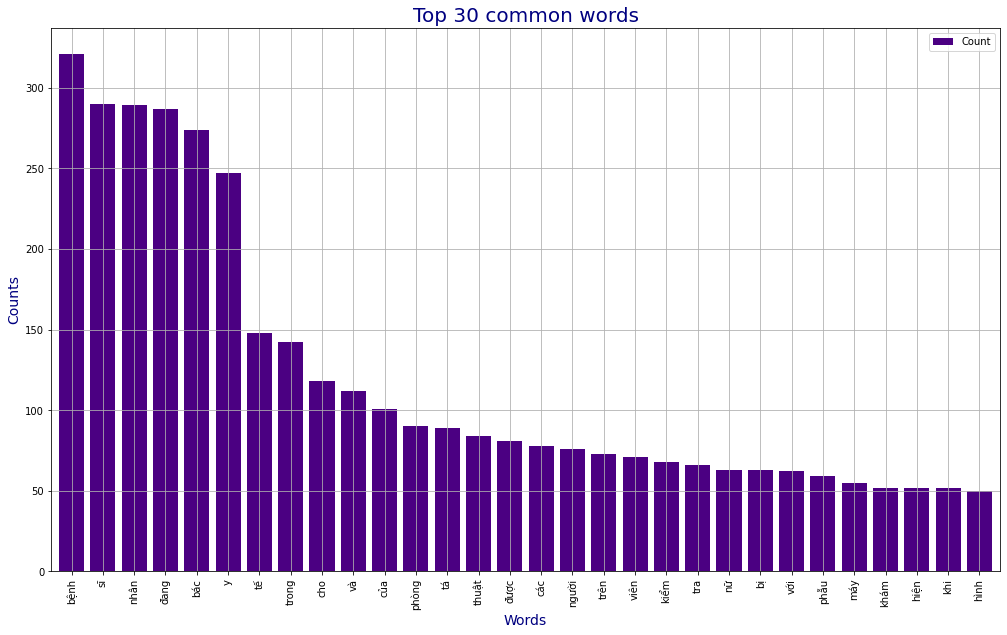

In [27]:
for word, count in tokenizer_top_words_count.most_common(30) :
  print(word, ": ", count)

tokens = tokenizer_top_words_count.most_common(30)
most_com_words_df = pd.DataFrame(tokens, columns = ['Word', 'Count'])

#plot 30 most common words
most_common_words_df.plot.bar(x = 'Word', y= 'Count', width=0.8, color = 'indigo', figsize = (17, 10))
plt.title('Top 30 common words', fontsize =20, color= 'navy')
plt.xlabel('Words', fontsize =14, color= 'navy')
plt.ylabel('Counts', fontsize =14, color= 'navy')
plt.grid(b=None)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  after removing the cwd from sys.path.


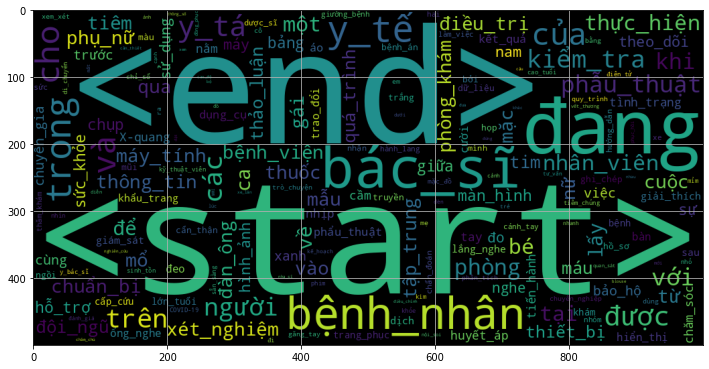

In [28]:
wordcloud_token = WordCloud(width = 1000, height = 500).generate_from_frequencies(tokenizer_top_words_count)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud_token)
plt.grid(b = None)

In [29]:
# Pad each vector to the max_length of the captions  store it to a vairable

train_seqs_len = [len(seq) for seq in train_seqs]

longest_word_length = max(train_seqs_len)

cap_vector= tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding= 'post', maxlen = longest_word_length,
                                                          dtype='int32', value=0)
print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(552, 21)


In [30]:
# creating list to store preprocessed images and setting up the Image Shape

preprocessed_image = []
IMAGE_SHAPE = (299, 299)

In [31]:
#checking image format 

tf.keras.backend.image_data_format()


'channels_last'

In [32]:
for img in all_imgs[0:5] :
    img = tf.io.read_file(img, name=None)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    preprocessed_image.append(img)


Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)


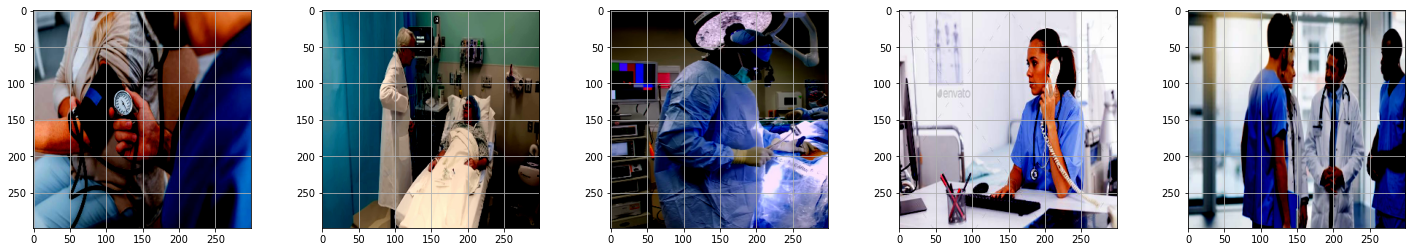

In [33]:
# checking first five images post preprocessing
Display_Images = preprocessed_image[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(25)
for ax, image in zip(axes, Display_Images) :
  print('Shape after resize : ', image.shape)
  ax.imshow(image)
  ax.grid('off')


 <h2>  Dataset creation
</h2><ul>
  <li><p>Create a function which maps the image path to their feature</p>
        </li>
  <li><p>Create a builder function to create train & test dataset & apply the function created earlier to transform the dataset</p></li>
  <li>Apply train_test_split on both image path & captions to create the train & test list. Create the train-test spliit using 80-20 ratio & random state = 42
</li>
    <li>Make sure you have done Shuffle and batch while building the dataset</li>
<li>
The shape of each image in the dataset after building should be (batch_size, 8*8, 2048)
</li>

</ul>






In [34]:
def load_images(image_path) :
  img = tf.io.read_file(image_path, name = None)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, IMAGE_SHAPE)
  img = tf.keras.applications.inception_v3.preprocess_input(img)
  return img, image_path

In [35]:
all_img_vector

['/kaggle/input/healthcare-vietnamese-images-captioning/images/1.png',
 '/kaggle/input/healthcare-vietnamese-images-captioning/images/1.png',
 '/kaggle/input/healthcare-vietnamese-images-captioning/images/1.png',
 '/kaggle/input/healthcare-vietnamese-images-captioning/images/1.png',
 '/kaggle/input/healthcare-vietnamese-images-captioning/images/2.png',
 '/kaggle/input/healthcare-vietnamese-images-captioning/images/2.png',
 '/kaggle/input/healthcare-vietnamese-images-captioning/images/2.png',
 '/kaggle/input/healthcare-vietnamese-images-captioning/images/2.png',
 '/kaggle/input/healthcare-vietnamese-images-captioning/images/3.png',
 '/kaggle/input/healthcare-vietnamese-images-captioning/images/3.png',
 '/kaggle/input/healthcare-vietnamese-images-captioning/images/3.png',
 '/kaggle/input/healthcare-vietnamese-images-captioning/images/3.png',
 '/kaggle/input/healthcare-vietnamese-images-captioning/images/4.png',
 '/kaggle/input/healthcare-vietnamese-images-captioning/images/4.png',
 '/kag

In [36]:
# Map each image full path to the function, in order to preprocess the image
training_list = sorted(set(all_img_vector))
New_Img = tf.data.Dataset.from_tensor_slices(training_list)
New_Img = New_Img.map(load_images, num_parallel_calls = tf.data.experimental.AUTOTUNE)
New_Img = New_Img.batch(64, drop_remainder=False)


In [37]:
#Ratio = 80:20 and we will set random state = 42
path_train, path_test, caption_train, caption_test = train_test_split(all_img_vector, cap_vector, test_size = 0.2, random_state = 42)

In [38]:
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(caption_train)))
print("Testing data for Captions: " + str(len(caption_test)))

Training data for images: 441
Testing data for images: 111
Training data for Captions: 441
Testing data for Captions: 111


 <h2> Load the pretrained Imagenet weights of Inception net V3
</h2><ul>
  <li><p>To save the memory(RAM) from getting exhausted, extract the features of the images using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.</p>
        </li>
  <li><p>The shape of the output of this layer is 8x8x2048.</p></li>
  <li>Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)
</li>
   

    

In [39]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')
new_input = image_model.input 
hidden_layer = image_model.layers[-1].output  
image_features_extract_model = tf.compat.v1.keras.Model(new_input, hidden_layer)

87924736/87910968 [==============================] - 1s 0us/step


In [40]:
# Once the features are created, you need to reshape them such that feature shape is in order of (batch_size, 8*8, 2048)
image_features_extract_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [41]:
# extract features from each image in the dataset
img_features = {}
for image, image_path in tqdm(New_Img) :
  batch_features = image_features_extract_model(image)
  #squeeze out the features in a batch
  batch_features_flattened = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))
  for batch_feat, path in zip(batch_features_flattened, image_path) :
    feature_path = path.numpy().decode('utf-8')
    img_features[feature_path] = batch_feat.numpy()

100%|██████████| 3/3 [00:08<00:00,  2.72s/it]


In [42]:
batch_features

<tf.Tensor: shape=(22, 8, 8, 2048), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.05399368, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.05196705,
          0.22266553, 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.23366345,
          0.46291533, 0.        ],
         [0.        , 0.        , 0.        , ..., 0.3926601 ,
          0.08570583, 0.        ],
         [0.        , 0.        , 0.        , ..., 0.49341056,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.0590052 ,
          0.        , 0.        ],
         ...,
         [0.        , 0.      

In [43]:
batch_features_flattened

<tf.Tensor: shape=(22, 64, 2048), dtype=float32, numpy=
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.05399368, 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.05196705,
         0.22266553, 0.        ],
        ...,
        [0.        , 0.9444217 , 1.4457704 , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.5362222 , 0.42627674, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.39379463, 0.8720417 , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.13923177, 0.        , ..., 0.3582182 ,
         0.        , 0.24702524],
        [0.        , 0.        , 0.        , ..., 0.4447608 ,
         0.        , 0.30735397],
        [0.        , 0.24136418, 0.        , ..., 0.9177213 ,
         0.        , 0.2759729 ],
        ...,
        [0.9654428 , 0.        , 0.        , ..., 1.

In [44]:
batch_feat.shape

TensorShape([64, 2048])

In [45]:
#view top five items of img_features dict
import more_itertools
top_5 = more_itertools.take(5, img_features.items())
top_5

[('/kaggle/input/healthcare-vietnamese-images-captioning/images/1.png',
  array([[0.42693344, 1.5409602 , 1.7137336 , ..., 0.        , 0.        ,
          0.        ],
         [1.4279872 , 1.0398223 , 2.9643211 , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 0.        , 0.82879496, ..., 0.        , 0.        ,
          0.        ],
         ...,
         [0.5026367 , 1.7203181 , 0.        , ..., 0.        , 1.1733595 ,
          1.6000528 ],
         [1.3894207 , 1.0656708 , 0.        , ..., 0.        , 1.0998203 ,
          2.0715222 ],
         [2.0000143 , 0.80415845, 0.        , ..., 0.        , 1.2908994 ,
          2.003168  ]], dtype=float32)),
 ('/kaggle/input/healthcare-vietnamese-images-captioning/images/10.png',
  array([[0.        , 0.34308806, 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 0.35092497, 0.        , ..., 0.06959602, 0.07571606,
          0.        ],
         [0.        , 0.        , 0.   

In [46]:
#to provide, both images along with the captions as input
def map(image_name, caption):
    img_tensor = img_features[image_name.decode('utf-8')]
    return img_tensor, caption

In [47]:
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier
BUFFER_SIZE = 1000
BATCH_SIZE = 64
def gen_dataset(img, capt):
        
    data = tf.data.Dataset.from_tensor_slices((img, capt))
    data = data.map(lambda ele1, ele2 : tf.numpy_function(map, [ele1, ele2], [tf.float32, tf.int32]),
                    num_parallel_calls = tf.data.experimental.AUTOTUNE)
    
     
    data = (data.shuffle(BUFFER_SIZE, reshuffle_each_iteration= True).batch(BATCH_SIZE, drop_remainder = False)
    .prefetch(tf.data.experimental.AUTOTUNE))
    return data

In [48]:
train_dataset = gen_dataset(path_train,caption_train)
test_dataset = gen_dataset(path_test,caption_test)

In [49]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

(64, 64, 2048)
(64, 21)


<h2> Model Building</h2>
<ul>
 <li><p>Set the parameters</p></li>
<li><p>Build the Encoder</p></li>
<li><p>Visualise the top 30 occuring words in the captions<p></li>
    <li><p>Visualise the top 30 occuring words in the captions</p></li>
    <li><p>Create a list which contains all the captions & path</p></li>
</ul>

In [50]:
# Setting  parameters

embedding_dim = 256 
units = 512

#top 5,000 words +1
vocab_size = 5001
train_num_steps = len(path_train) // BATCH_SIZE 
test_num_steps = len(path_test) // BATCH_SIZE  

max_length = 31
feature_shape = batch_feat.shape[1]
attention_feature_shape = batch_feat.shape[0]

 <h2>  Encoder (CNN)
</h2><ul>
  <li><p>The encoder parts involve the convolution of the input image with the help of various convolution, max pooling, and fully connected layers. </p>
        </li>
  <li><p>Since we are not dealing with the classification of the image, we have removed them from the end. 
</p></li>
    <li><p>The final output of the encoder part will be the generation of the feature vector.</p>
</li>
    
</ul>


In [51]:
tf.compat.v1.reset_default_graph()
print(tf.compat.v1.get_default_graph())

In [52]:
#Building Encoder using CNN Keras subclassing method

class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim) #build your Dense layer with relu activation
        
    def call(self, features):
        features =  self.dense(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        features =  tf.keras.activations.relu(features, alpha=0.01, max_value=None, threshold=0)
        return features

In [53]:
encoder=Encoder(embedding_dim)

In [54]:
from keras.utils.vis_utils import plot_model



 <h2> Important aspects of Encoder
</h2><ul>
  <li><p>The CNN-based encoder produces the feature vector which is the encoded representation of the input image.</p>
        </li>
  <li><p>The resulting **feature vector is static** and does not change at each timestamp.
    </p></li>
    <li><p>Therefore we need to pass this vector to the **attention model along with the hidden state of the decoder to create the context vector**. </p>
</li>
   
</ul>


 <h2> Attention model
</h2><ul>
  <li><p>Attention is an interface connecting the encoder and decoder that provides the decoder with information from every encoder hidden state.</p>
        </li>
  <li><p>With this framework, the model is able to  selectively focus on valuable parts of the input sequence and hence, learn the association between them.</p></li>
    <li><p>The attention model produces an output(context vector) that is fed to the decoder for predicting the word at that timestamp</p>
</li>
    <li><p>This output, i.e context vector is adaptive in nature and change for each timestamp</p>
</li>
    <li><p>It aims to overcome the limitation of traditional CNN-RNN based models. Using this, **instead of passing the complete input image to the RNN at every timestamp, we can pass different relevant parts of the image to it</p></li>
</ul>


 

In [55]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units) 
        self.W2 = tf.keras.layers.Dense(units) 
        self.V = tf.keras.layers.Dense(1) 
        self.units=units

    def call(self, features, hidden):
        hidden_with_time_axis = hidden[:, tf.newaxis]
        score = tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis))  
        attention_weights = tf.keras.activations.softmax(self.V(score), axis=1) 
        context_vector = attention_weights * features 
        context_vector = tf.reduce_sum(context_vector, axis=1)  
        return context_vector, attention_weights

 <h2> Decoder </h2><ul>
  <li><p>Input to GRU : Context vector (from attention model) concatenated with  embedded vector (embedding layer). Output of this concatenation layer is fed to GRU as input</p>
        </li>
  <li><p>Embedding layer present inside the decoder takes the input sequence preprocessed and transformed such that all samples have equal sequence length - through padding followed by masking). Embedding layer transforms this into an embedded vector.</p></li>
  <li><p>Concatenation layer contains : Embedded vector (output of embedding layer) along with the Context vector (output of attention model)</p>
</li>
    
</ul>




In [56]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units) #iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim) #build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size) #build your Dense layer
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden) #create your context vector & attention weights from attention model
        embed = self.embed(x) # embed your input to shape: (batch_size, 1, embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis = -1) # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output, state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [57]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [58]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)


 <h2> Model training & optimization
</h2><ul>
  <li><p>Set the optimizer & loss object</p></li>
  <li><p>Visualise both the images & text present in the dataset</p></li>
    <li><p>Create your checkpoint path</p></li>
    <li><p>Create your training & testing step functions</p></li>
    <li><p>Create your loss function for the test dataset</p></li>
</ul>




In [59]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)  #define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True, reduction = tf.keras.losses.Reduction.NONE) #define your loss object

In [60]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    #loss is getting multiplied with mask to get an ideal shape
    
    return tf.reduce_mean(loss_)

 <h2> Why Masking ?</h2>
 <ul>
  <li><p>Padding can result in a risk of adding penalty to the model.</p>
        </li>
  <li><p>Once the padding is done, we need to apply 'masking'</p></li>
    <li><p>Without masking, the model will **consider the padded input at that timestep, which will contribute to an increased loss</p>
</li>
    <li><p>Through masking we need to inform the model to **ignore whenever a padded input is passed at a timestep**, hinting that this part of the input is padded.</p>
</li>
<li>Create a list which contains all the captions & path</li>
</ul>

  
 




In [61]:
checkpoint_path = "HealthCare/checkpoint1"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [62]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

 <h2> While creating the training step for your model, we will apply Teacher forcing mechanism.
</h2><ul>
  <li><p>Why Teacher Forcing ?</p></li>
  <li><p>There are multiple issues with with training recurrent neural networks that use output from prior time steps as input :</p></li>
 <li><p>Slow convergence</p></li>
    
 <li><p>Model instability</p></li>
    
 <li><p>Poor skill</p></li>
 <li><p>If the previous output is incorrect (by any chance), it will result in inaccurate input for the next time stamp which will further result in a different output than expected and the process will continue.</p>
</li>
<li>As a result, the model will get off track and will get punished for every subsequent word it generates. This makes learning slower and the model unstable.</li>
<li><p>To address this we Teacher Forcing</p></li>
</ul>



 <P>Teacher forcing is a fast and effective way to train a recurrent neural network, where the **target/real word (i.e ground truth) is passed as the next input to the decoder instead of previous prediciton or output.**
 
 
 Training with Teacher Forcing **converges faster.** At the early stages of training, the predictions of the model are very bad.
 
 If we do not use Teacher Forcing, the hidden states of the model will be updated by a sequence of wrong predictions, errors will accumulate, and it is difficult for the model to learn from that.</P>

In [63]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        
        encoder_op = encoder(img_tensor)
        for r in range(1, target.shape[1]) :
          predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
          loss = loss + loss_function(target[:, r], predictions) 
          dec_input = tf.expand_dims(target[:, r], 1)  

    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) 
    optimizer.apply_gradients(zip(grad, trainable_vars))

    return loss, avg_loss

In [64]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size = target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    with tf.GradientTape() as tape:
      encoder_op = encoder(img_tensor)
      for r in range(1, target.shape[1]) :
        predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
        loss = loss + loss_function(target[:, r], predictions)
        dec_input = tf.expand_dims(target[: , r], 1)
    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) 
    optimizer.apply_gradients(zip(grad, trainable_vars))                      
    return loss, avg_loss

In [65]:
def test_loss_cal(test_dataset):
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(test_dataset) :
      batch_loss, t_loss = test_step(img_tensor, target)
      total_loss = total_loss + t_loss
      avg_test_loss = total_loss/ test_num_steps

    return avg_test_loss

In [66]:
loss_plot = []
test_loss_plot = []
EPOCHS = 30
best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps   
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  0%|          | 0/30 [00:00<?, ?it/s]

For epoch: 1, the train loss is 4.366, & test loss is 6.332
Time taken for 1 epoch 65.84445023536682 sec

Test loss has been reduced from 100.000 to 6.332


  7%|▋         | 2/30 [01:07<12:58, 27.79s/it]

For epoch: 2, the train loss is 3.418, & test loss is 5.851
Time taken for 1 epoch 0.8536112308502197 sec

Test loss has been reduced from 6.332 to 5.851


 10%|█         | 3/30 [01:07<06:58, 15.51s/it]

For epoch: 3, the train loss is 3.291, & test loss is 5.785
Time taken for 1 epoch 0.7718515396118164 sec

Test loss has been reduced from 5.851 to 5.785


 13%|█▎        | 4/30 [01:08<04:13,  9.74s/it]

For epoch: 4, the train loss is 3.268, & test loss is 5.700
Time taken for 1 epoch 0.770437479019165 sec

Test loss has been reduced from 5.785 to 5.700


 17%|█▋        | 5/30 [01:09<02:42,  6.50s/it]

For epoch: 5, the train loss is 3.241, & test loss is 5.730
Time taken for 1 epoch 0.7550563812255859 sec



 20%|██        | 6/30 [01:10<01:50,  4.60s/it]

For epoch: 6, the train loss is 3.193, & test loss is 5.551
Time taken for 1 epoch 0.7615697383880615 sec

Test loss has been reduced from 5.700 to 5.551


 23%|██▎       | 7/30 [01:11<01:18,  3.39s/it]

For epoch: 7, the train loss is 3.146, & test loss is 5.474
Time taken for 1 epoch 0.777268648147583 sec

Test loss has been reduced from 5.551 to 5.474


 27%|██▋       | 8/30 [01:12<00:57,  2.61s/it]

For epoch: 8, the train loss is 3.069, & test loss is 5.296
Time taken for 1 epoch 0.7748184204101562 sec

Test loss has been reduced from 5.474 to 5.296


 30%|███       | 9/30 [01:13<00:43,  2.08s/it]

For epoch: 9, the train loss is 2.964, & test loss is 5.090
Time taken for 1 epoch 0.7725398540496826 sec

Test loss has been reduced from 5.296 to 5.090


 33%|███▎      | 10/30 [01:14<00:34,  1.71s/it]

For epoch: 10, the train loss is 2.835, & test loss is 4.866
Time taken for 1 epoch 0.7603433132171631 sec

Test loss has been reduced from 5.090 to 4.866


 37%|███▋      | 11/30 [01:15<00:27,  1.47s/it]

For epoch: 11, the train loss is 2.698, & test loss is 4.629
Time taken for 1 epoch 0.7715094089508057 sec

Test loss has been reduced from 4.866 to 4.629


 40%|████      | 12/30 [01:15<00:23,  1.30s/it]

For epoch: 12, the train loss is 2.572, & test loss is 4.416
Time taken for 1 epoch 0.7657008171081543 sec

Test loss has been reduced from 4.629 to 4.416


 43%|████▎     | 13/30 [01:16<00:20,  1.18s/it]

For epoch: 13, the train loss is 2.462, & test loss is 4.218
Time taken for 1 epoch 0.7684979438781738 sec

Test loss has been reduced from 4.416 to 4.218


 47%|████▋     | 14/30 [01:17<00:17,  1.10s/it]

For epoch: 14, the train loss is 2.343, & test loss is 4.000
Time taken for 1 epoch 0.7656214237213135 sec

Test loss has been reduced from 4.218 to 4.000


 50%|█████     | 15/30 [01:18<00:15,  1.05s/it]

For epoch: 15, the train loss is 2.221, & test loss is 3.783
Time taken for 1 epoch 0.7969009876251221 sec

Test loss has been reduced from 4.000 to 3.783


 53%|█████▎    | 16/30 [01:19<00:14,  1.01s/it]

For epoch: 16, the train loss is 2.117, & test loss is 3.568
Time taken for 1 epoch 0.7682926654815674 sec

Test loss has been reduced from 3.783 to 3.568


 57%|█████▋    | 17/30 [01:20<00:12,  1.03it/s]

For epoch: 17, the train loss is 2.001, & test loss is 3.387
Time taken for 1 epoch 0.7566862106323242 sec

Test loss has been reduced from 3.568 to 3.387


 60%|██████    | 18/30 [01:21<00:11,  1.05it/s]

For epoch: 18, the train loss is 1.890, & test loss is 3.170
Time taken for 1 epoch 0.7680883407592773 sec

Test loss has been reduced from 3.387 to 3.170


 63%|██████▎   | 19/30 [01:22<00:10,  1.06it/s]

For epoch: 19, the train loss is 1.782, & test loss is 2.947
Time taken for 1 epoch 0.7734096050262451 sec

Test loss has been reduced from 3.170 to 2.947


 67%|██████▋   | 20/30 [01:23<00:09,  1.07it/s]

For epoch: 20, the train loss is 1.680, & test loss is 2.773
Time taken for 1 epoch 0.7799837589263916 sec

Test loss has been reduced from 2.947 to 2.773


 70%|███████   | 21/30 [01:24<00:08,  1.08it/s]

For epoch: 21, the train loss is 1.589, & test loss is 2.603
Time taken for 1 epoch 0.7700495719909668 sec

Test loss has been reduced from 2.773 to 2.603


 73%|███████▎  | 22/30 [01:25<00:07,  1.08it/s]

For epoch: 22, the train loss is 1.504, & test loss is 2.456
Time taken for 1 epoch 0.7713901996612549 sec

Test loss has been reduced from 2.603 to 2.456


 77%|███████▋  | 23/30 [01:26<00:06,  1.07it/s]

For epoch: 23, the train loss is 1.445, & test loss is 2.368
Time taken for 1 epoch 0.8185896873474121 sec

Test loss has been reduced from 2.456 to 2.368


 80%|████████  | 24/30 [01:26<00:05,  1.08it/s]

For epoch: 24, the train loss is 1.373, & test loss is 2.179
Time taken for 1 epoch 0.7656607627868652 sec

Test loss has been reduced from 2.368 to 2.179


 83%|████████▎ | 25/30 [01:27<00:04,  1.08it/s]

For epoch: 25, the train loss is 1.300, & test loss is 2.096
Time taken for 1 epoch 0.771885871887207 sec

Test loss has been reduced from 2.179 to 2.096


 87%|████████▋ | 26/30 [01:28<00:03,  1.08it/s]

For epoch: 26, the train loss is 1.258, & test loss is 1.975
Time taken for 1 epoch 0.781602144241333 sec

Test loss has been reduced from 2.096 to 1.975


 90%|█████████ | 27/30 [01:29<00:02,  1.09it/s]

For epoch: 27, the train loss is 1.183, & test loss is 1.862
Time taken for 1 epoch 0.7679779529571533 sec

Test loss has been reduced from 1.975 to 1.862


 93%|█████████▎| 28/30 [01:30<00:01,  1.10it/s]

For epoch: 28, the train loss is 1.116, & test loss is 1.794
Time taken for 1 epoch 0.751962423324585 sec

Test loss has been reduced from 1.862 to 1.794


 97%|█████████▋| 29/30 [01:31<00:00,  1.10it/s]

For epoch: 29, the train loss is 1.065, & test loss is 1.670
Time taken for 1 epoch 0.7700469493865967 sec

Test loss has been reduced from 1.794 to 1.670


100%|██████████| 30/30 [01:32<00:00,  3.08s/it]

For epoch: 30, the train loss is 1.010, & test loss is 1.597
Time taken for 1 epoch 0.7652795314788818 sec

Test loss has been reduced from 1.670 to 1.597


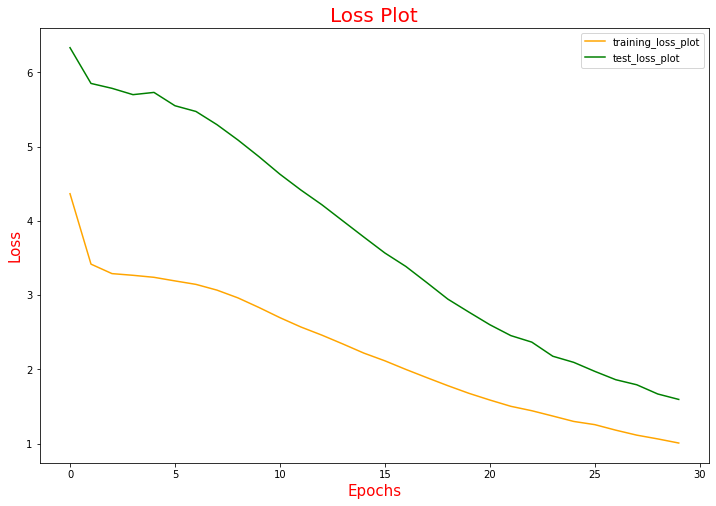

In [67]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8))
plt.plot(loss_plot, color='orange', label = 'training_loss_plot')
plt.plot(test_loss_plot, color='green', label = 'test_loss_plot')
plt.xlabel('Epochs', fontsize = 15, color = 'red')
plt.ylabel('Loss', fontsize = 15, color = 'red')
plt.title('Loss Plot', fontsize = 20, color = 'red')
plt.legend()
plt.show()


<h2>Model Evaluation</h2> 
<ul>
<li><p>Define your evaluation function using greedy search</p></li>
<li><p>Define your evaluation function using beam search ( optional)</p></li>
<li><p>Test it on a sample data using BLEU score</p></li>
</ul>

<h2>Greedy Search</h2>
<ul>
 <li>This method is a simple approximation technique which calculates the probability of the words according to their occurrence in the English vocabulary.</li>
 
 <li>It takes the sample of the words, finds the probability of each of the words, and then outputs the word with the highest probability.</li>
 
 <li>Greedy Search will always consider only one best alternative and this makes the computational speed of the model fast, but the accuracy might not be up to the mark.</li>
    </ul>

In [68]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_feature_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_images(image)[0], 0) 
    img_tensor_val = image_features_extract_model(temp_input) 
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder (img_tensor_val) 

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden) 
        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy() 
        result.append (tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


In [69]:
def plot_attention_map (caption, weights, image) :

  fig = plt.figure(figsize = (20, 20))
  temp_img = np.array(Image.open(image))

  cap_len = len(caption)
  for cap in range(cap_len) :
    weights_img = np.reshape(weights[cap], (8,8))
    wweights_img = np.array(Image.fromarray(weights_img).resize((224,224), Image.LANCZOS))

    ax = fig.add_subplot(cap_len//2, cap_len//2, cap+1)
    ax.set_title(caption[cap], fontsize = 14, color = 'red')

    img = ax.imshow(temp_img)

    ax.imshow(weights_img, cmap='gist_heat', alpha=0.6, extent=img.get_extent())
    ax.axis('off')
  plt.subplots_adjust(hspace=0.2, wspace=0.2)
  plt.show()

In [70]:
from nltk.translate.bleu_score import sentence_bleu

In [71]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [72]:
image_test = path_test.copy()

In [73]:
def pred_caption_audio(random, autoplay=False, weights=(0.5, 0.5, 0, 0)) :

    cap_test_data = caption_test.copy()
    rid = np.random.randint(0, random)
    test_image = image_test[rid]
    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test_data[rid] if i not in [0]])
    result, attention_plot, pred_test = evaluate(test_image)
    real_caption=filt_text(real_caption)      
    pred_caption=' '.join(result).rsplit(' ', 1)[0]
    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate = pred_caption.split()
    score = sentence_bleu(reference, candidate, weights=weights)#set your weights
    print(f"BLEU score: {score*100}")
    print ('Real Caption:', real_caption)
    print ('Prediction Caption:', pred_caption)
    plot_attention_map(result, attention_plot, test_image)
    speech = gTTS('Predicted Caption : ' + pred_caption, lang = 'en', slow = False)
    speech.save('voice.mp3')
    audio_file = 'voice.mp3'

    display.display(display.Audio(audio_file, rate = None, autoplay = autoplay))

    return test_image
    


 <h2> Test Images
</h2><ul>
  <li><p>BLEU is a well-acknowledged metric to measure similarity of one hypothesis sentence to multiple reference sentences. Given a single hypothesis sentence and multiple reference sentences, it returns a value between 0 and 1</p>
        </li>
  <li><p>The metric close to 1 means that the two are very similar.</p></li>
  <li>We use the BLEU measure to evaluate the result of the test set generated captions. The BLEU is simply taking the fraction of n-grams in the predicted sentence that appears in the ground-truth
</li>   
</ul>

/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU score: 25.819888974716115
Real Caption: gia_đình đang chăm_sóc và động_viên cậu con trai tại bệnh_viện
Prediction Caption: cậu bé đang nằm trên giường_bệnh nằm trên giường_bệnh nằm trên giường_bệnh nằm trên giường_bệnh nằm trên giường_bệnh nằm trên giường_bệnh nằm trên giường_bệnh nằm trên giường_bệnh nằm trên giường_bệnh


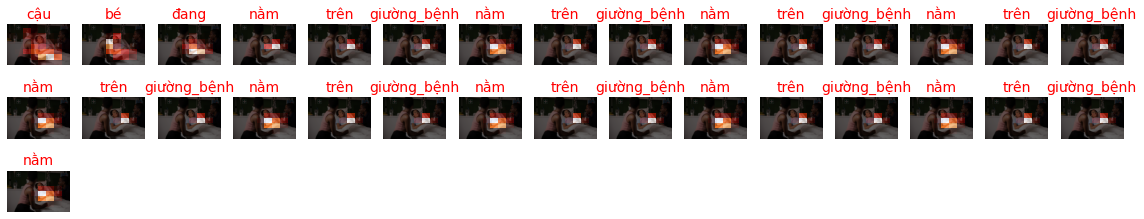

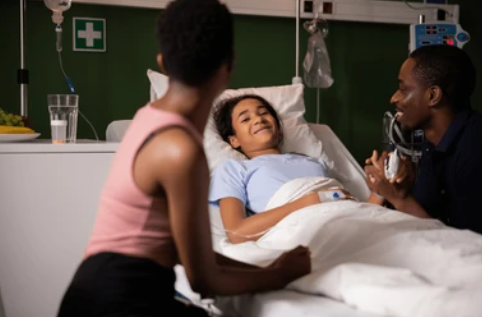

In [74]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

BLEU score: 0
Real Caption: quá_trình kiểm_tra huyết_áp_định_kỳ trong môi_trường y_tế
Prediction Caption: y_tá đang đo huyết_áp của y_tá đang đo huyết_áp của y_tá đang đo huyết_áp của y_tá đang đo huyết_áp của y_tá đang đo huyết_áp của y_tá đang đo huyết_áp của


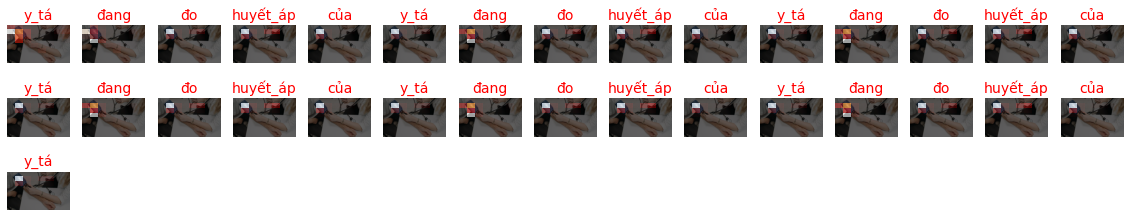

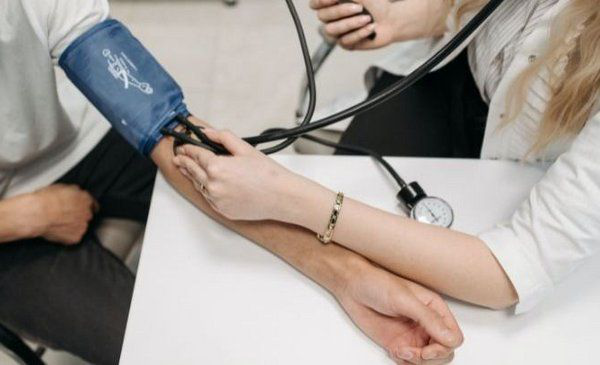

In [75]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

BLEU score: 55.9299581157807
Real Caption: hai nhân_viên y_tế mặc đồng_phục đang xem_xét hồ_sơ bệnh_án trên tấm bảng
Prediction Caption: đội_ngũ y_tế đang thảo_luận về hồ_sơ bệnh_án trên tấm bảng


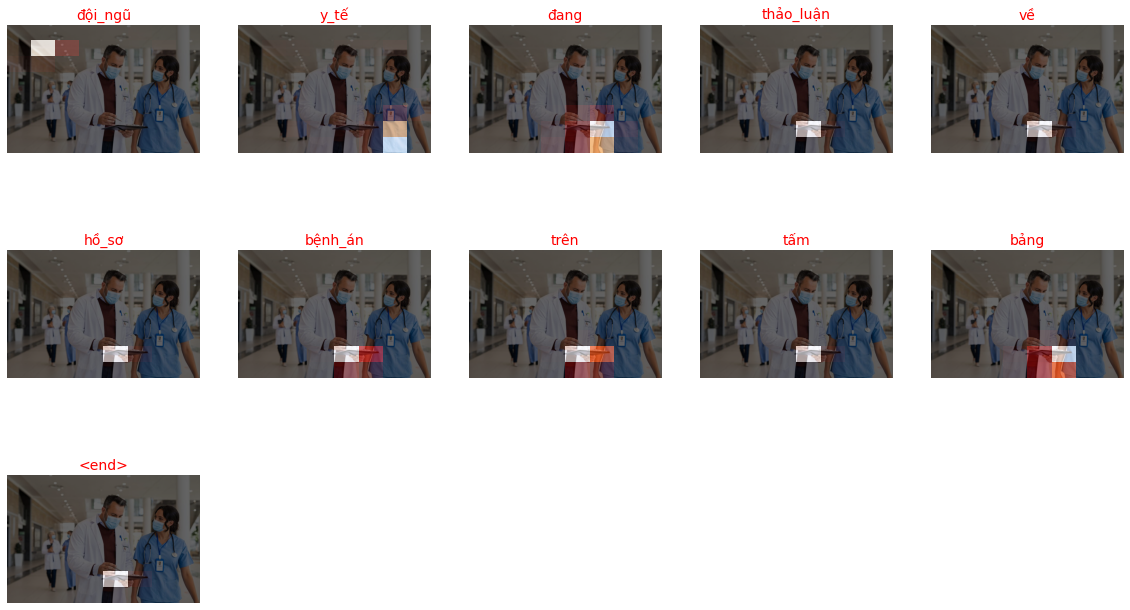

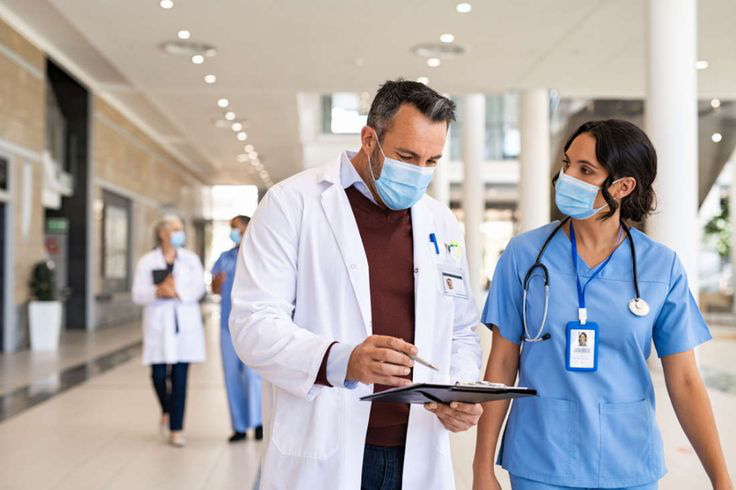

In [76]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU score: 13.130643285972257
Real Caption: bác_sĩ đang cầm kim tiêm để lấy máu xét_nghiệm cho bệnh_nhân
Prediction Caption: bác_sĩ đang lấy máu để lấy máu để lấy máu để lấy máu để lấy máu để lấy máu để lấy máu để lấy máu để lấy máu để lấy


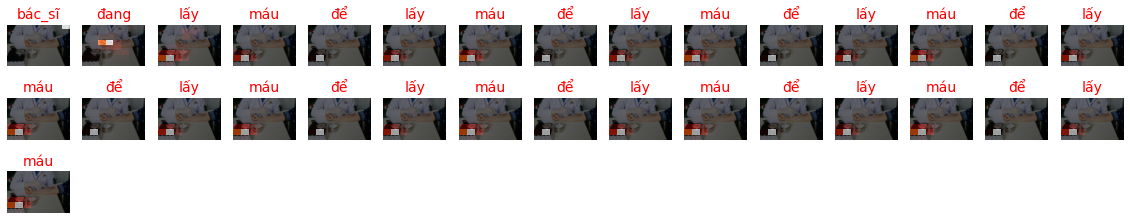

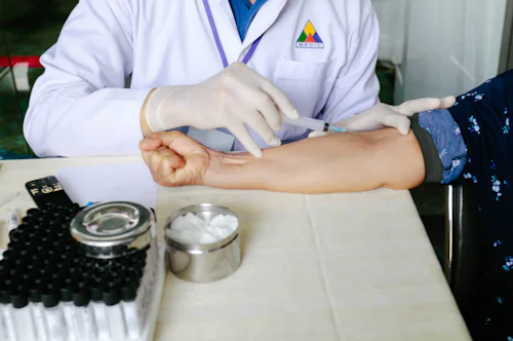

In [77]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.5, 0, 0))
Image.open(test_image)

/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU score: 11.72037933112689
Real Caption: một người đàn_ông lớn_tuổi đang được tiêm vắc xin bởi bác_sĩ nữ
Prediction Caption: bác_sĩ đang tiêm thuốc


ValueError: num must be 1 <= num <= 4, not 5

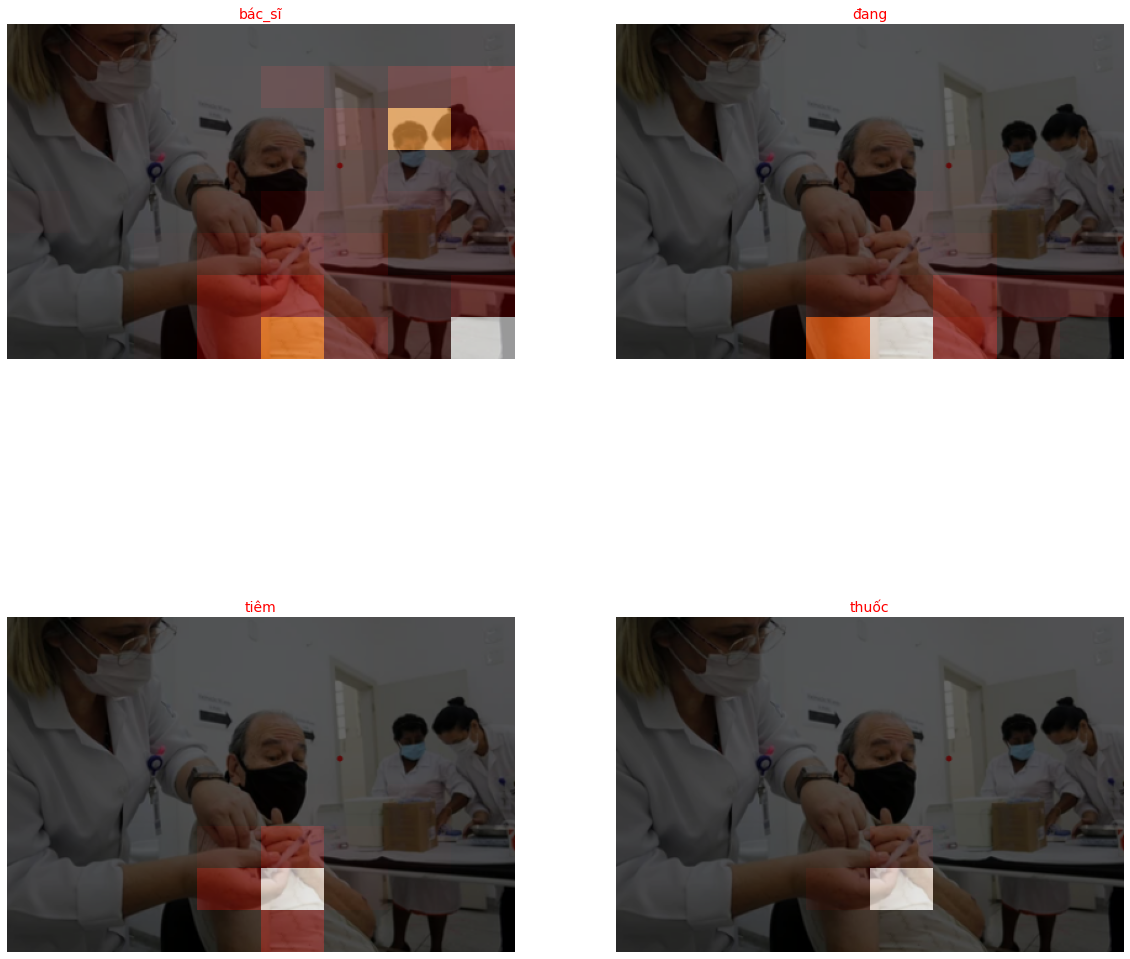

In [78]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.5, 0, 0))
Image.open(test_image)

In [ ]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.25, 0.25, 0, 0))
Image.open(test_image)

In [ ]:
encoder.save_weights('./outputs_encoder')
decoder.save_weights('./outputs_decoder')